# Source

This notebook is modifed from the following notebooks by Sam:
    
* Quickdraw-100 classes-10k Example Setup.ipynb
* Quickdraw-40 classes-2k Example Setup.ipynb
* MNIST CNN - Guide example-Monday night.ipynb

# Loading images from the Quick Draw Dataset 10k examples


get the data at https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap?pli=1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
import keras.backend as K
from keras.applications.inception_v3 import InceptionV3

import tensorflow as tf

import os
import pickle
import numpy as np

# Programmed on
# Keras version 2.0.8
# Tensorflow version 1.3.0
print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.0.8
1.3.0


In [2]:
# EXECUTION_MODE = "train" # to train a new model
EXECUTION_MODE = "load_pretrained" # to load a saved model that was trained previously
FILE_SUFFIX = "40_classes_2k"
# FILE_SUFFIX = "100_classes_10k"

In [3]:
def plot_train(list_of_histories):
    
    if 'acc' in list_of_histories[0].history:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    
    train_meas = []
    val_meas = []
    for hist in list_of_histories:
        train_meas = train_meas + hist.history[meas]
        val_meas = val_meas + hist.history['val_'+meas]

    plt.plot(train_meas)
    plt.plot(val_meas)
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

In [4]:
if FILE_SUFFIX == "40_classes_2k":
    
    num_examples_per_class = 2000

    classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
               'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
               'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake']

    x_data = np.load("./x_data_40_classes_2k.npy")

elif FILE_SUFFIX == "100_classes_10k":
    
    num_examples_per_class = 10000

    classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
               'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
               'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake',
               'calculator','calendar','camel','camera','campfire','candle','cannon','canoe','car','carrot','cello','computer',
               'cat','chandelier','clock','cloud','coffee cup','compass','cookie','couch','cow','crab','crayon','crocodile','crown',
               'cup','diamond','dog','dolphin','donut','dragon','dresser','drill','drums','duck','dumbbell','ear','elbow',
               'elephant','envelope','eraser','eye','eyeglasses','face','fan','feather','fence','finger','fire hydrant',
               'fireplace','firetruck','fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer',
               'foot','fork']

    x_data = np.load("./x_data_100_classes_10k.npy")
    
len(classes)

40

## Lets make some labels for our data

In [5]:
labels = [np.full((num_examples_per_class,), classes.index(qdraw)) for qdraw in classes]

## Concat the arrays together
y_data = np.concatenate(labels,axis=0)
y_data.shape

(80000,)

## lets look at the Images 

In [6]:
def show_object(obj):
    # Reshape 784 array into 28x28 image
    image = obj.reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(image, cmap='gray_r')
    plt.show()

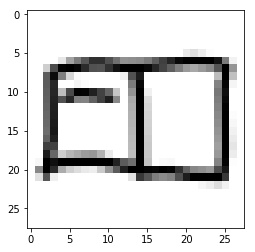

26


In [7]:
show_object(x_data[53000])
print(y_data[53000])

In [8]:
print(x_data.shape)
print(y_data.shape)

(80000, 784)
(80000,)


In [9]:
x_reshaped = x_data.reshape(x_data.shape[0], 28, 28, 1)
y_reshaped = keras.utils.to_categorical(y_data, len(classes))
x_reshaped = x_reshaped.astype('float32')
x_reshaped /= 256
print(x_reshaped.shape)
print(y_reshaped.shape)

(80000, 28, 28, 1)
(80000, 40)


In [10]:
#shuffling function
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [11]:
x_reshaped,y_reshaped = unison_shuffled_copies(x_reshaped,y_reshaped)
train_idx = int(x_reshaped.shape[0]*0.8)
x_train = x_reshaped[:train_idx]
x_test = x_reshaped[train_idx:]
y_train = y_reshaped[:train_idx]
y_test = y_reshaped[train_idx:]

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_train[0])
print(y_train[0])

(64000, 28, 28, 1)
(64000, 40)
[[[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0

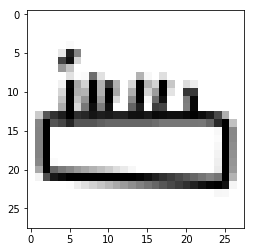

In [13]:
show_object(x_reshaped[0])

In [14]:
if EXECUTION_MODE == "load_pretrained":
    print("Model is loaded from a pretrained and saved model.")
    model = load_model("model_{}.h5".format(FILE_SUFFIX))
    
elif EXECUTION_MODE == "train":
   
    Inp=Input(shape=(28, 28, 1))
    x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
    x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_02')(x)
    x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
    x = Conv2D(128, (3, 3), activation='relu',name = 'Conv_03')(x)
    x = Conv2D(256, (3, 3), activation='relu',name = 'Conv_04')(x)
    x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_02')(x)
    x = Dropout(0.25,name = 'Dropout_01')(x)
    x = Flatten(name = 'Flatten_01')(x)
    x = Dense(128, activation='relu',name = 'Dense_01')(x)
    x = Dropout(0.5,name = 'Dropout_02')(x)
    output = Dense(len(classes), activation='softmax',name = 'Dense_02')(x)
    model = Model(Inp,output)
    print("Model is newly constructed.")

list_of_histories = [];
model.summary()

Model is loaded from a pretrained and saved model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 10, 10, 128)       73856     
_________________________________________________________________
Conv_04 (Conv2D)             (None, 8, 8, 256)         295168    
_________________________________________________________________
MaxPool_02 (MaxPooling2D)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,
          batch_size=100,
          epochs=5,
          verbose=1,
          callbacks = None,
          validation_data=(x_test, y_test))

list_of_histories.append(hist)

plot_train(list_of_histories)

In [15]:

# Evaluate model with test data set and share sample prediction results
evaluation = model.evaluate(x_test, y_test,
          batch_size=100)
print('Model Accuracy = %.2f' % (evaluation[1]))
print('Model Loss = %.2f' % (evaluation[0]))

16000/16000 [==============================] - 18s    
Model Accuracy = 0.86
Model Loss = 0.51


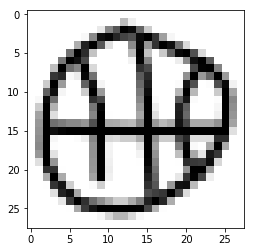

Actual:  basketball
Predicted:  basketball


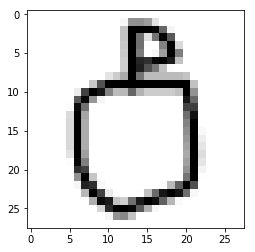

Actual:  apple
Predicted:  apple


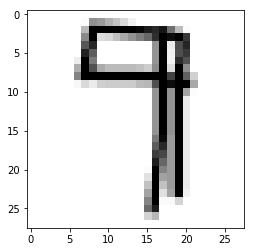

Actual:  axe
Predicted:  axe


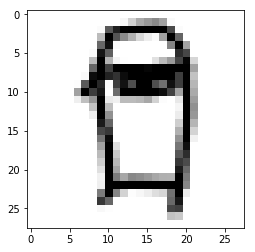

Actual:  bed
Predicted:  bed


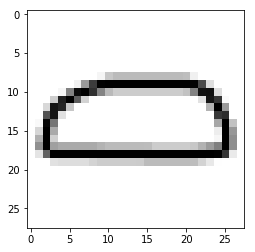

Actual:  bread
Predicted:  bread


In [16]:
model.save("model_{}.h5".format(FILE_SUFFIX))

rand_indices = np.random.randint(0, len(x_test), 5)
preds = model.predict(x_test[rand_indices])

for i, idx in enumerate(rand_indices):
    show_object(x_test[idx])
    print("Actual: ", classes[np.argmax(y_test[idx])])
    print("Predicted: ", classes[np.argmax(preds[i])])